<a href="https://colab.research.google.com/github/HarshBhajane/Advanced-Face-Mask-Detection-using-Deep-Learning-and-Convolutional-Neural-Networks-CNN-/blob/main/Advanced_Face_Mask_Detection_using_Deep_Learning_and_Convolutional_Neural_Networks_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 92% 150M/163M [00:00<00:00, 189MB/s]
100% 163M/163M [00:01<00:00, 167MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3277.jpg', 'with_mask_2278.jpg', 'with_mask_2881.jpg', 'with_mask_2963.jpg', 'with_mask_1573.jpg']
['with_mask_2410.jpg', 'with_mask_1620.jpg', 'with_mask_140.jpg', 'with_mask_1942.jpg', 'with_mask_1484.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_420.jpg', 'without_mask_3687.jpg', 'without_mask_2157.jpg', 'without_mask_26.jpg', 'without_mask_2220.jpg']
['without_mask_2923.jpg', 'without_mask_1329.jpg', 'without_mask_2362.jpg', 'without_mask_1216.jpg', 'without_mask_2572.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [12]:
# create the labels with mask= 1, without mask =0

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


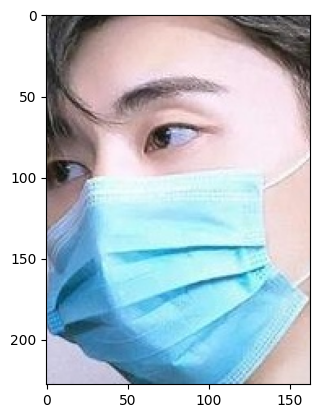

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

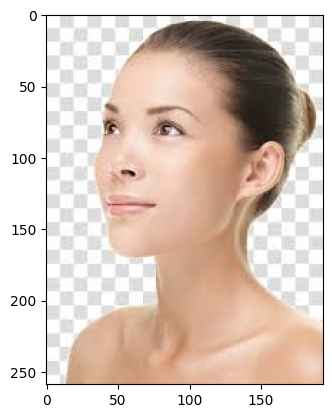

In [18]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
# convert images to numpy arrays+ resizing

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

In [22]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [253, 253, 253],
        [241, 241, 241],
        ...,
        [243, 238, 239],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)


(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_train[0]

array([[[225, 221, 221],
        [232, 229, 235],
        [195, 194, 198],
        ...,
        [148, 149, 144],
        [148, 149, 146],
        [156, 156, 155]],

       [[170, 166, 168],
        [154, 150, 157],
        [186, 186, 188],
        ...,
        [  8,   9,   4],
        [ 12,  13,   8],
        [ 30,  31,  28]],

       [[208, 203, 209],
        [154, 150, 159],
        [148, 148, 149],
        ...,
        [ 24,  27,  19],
        [ 28,  32,  25],
        [ 35,  37,  32]],

       ...,

       [[118, 117, 129],
        [  1,   0,  22],
        [ 25,  17,  48],
        ...,
        [248, 247, 252],
        [241, 239, 246],
        [245, 243, 252]],

       [[137, 136, 139],
        [ 38,  34,  52],
        [ 56,  47,  73],
        ...,
        [221, 218, 233],
        [141, 136, 168],
        [136, 129, 170]],

       [[244, 245, 238],
        [237, 234, 238],
        [238, 233, 240],
        ...,
        [253, 251, 255],
        [244, 241, 250],
        [238, 234, 245]]

In [34]:
X_train_scaled[0]

array([[[0.88235294, 0.86666667, 0.86666667],
        [0.90980392, 0.89803922, 0.92156863],
        [0.76470588, 0.76078431, 0.77647059],
        ...,
        [0.58039216, 0.58431373, 0.56470588],
        [0.58039216, 0.58431373, 0.57254902],
        [0.61176471, 0.61176471, 0.60784314]],

       [[0.66666667, 0.65098039, 0.65882353],
        [0.60392157, 0.58823529, 0.61568627],
        [0.72941176, 0.72941176, 0.7372549 ],
        ...,
        [0.03137255, 0.03529412, 0.01568627],
        [0.04705882, 0.05098039, 0.03137255],
        [0.11764706, 0.12156863, 0.10980392]],

       [[0.81568627, 0.79607843, 0.81960784],
        [0.60392157, 0.58823529, 0.62352941],
        [0.58039216, 0.58039216, 0.58431373],
        ...,
        [0.09411765, 0.10588235, 0.0745098 ],
        [0.10980392, 0.1254902 , 0.09803922],
        [0.1372549 , 0.14509804, 0.1254902 ]],

       ...,

       [[0.4627451 , 0.45882353, 0.50588235],
        [0.00392157, 0.        , 0.08627451],
        [0.09803922, 0

CNN


In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 141s 819ms/step - loss: 0.4562 - acc: 0.7927 - val_loss: 0.2809 - val_acc: 0.8694
Epoch 2/5
170/170 [==============================] - 136s 803ms/step - loss: 0.2947 - acc: 0.8821 - val_loss: 0.2219 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 127s 747ms/step - loss: 0.2352 - acc: 0.9071 - val_loss: 0.2489 - val_acc: 0.8909
Epoch 4/5
170/170 [==============================] - 129s 761ms/step - loss: 0.2081 - acc: 0.9165 - val_loss: 0.1971 - val_acc: 0.9074
Epoch 5/5
170/170 [==============================] - 130s 764ms/step - loss: 0.1811 - acc: 0.9250 - val_loss: 0.1686 - val_acc: 0.9355


Model Evaluation


In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 205ms/step - loss: 0.2418 - acc: 0.9265
Test Accuracy = 0.9265387058258057


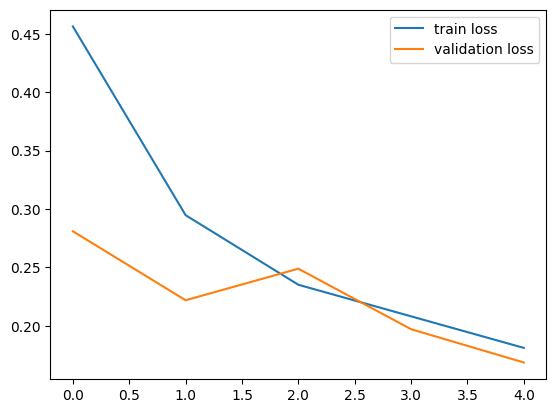

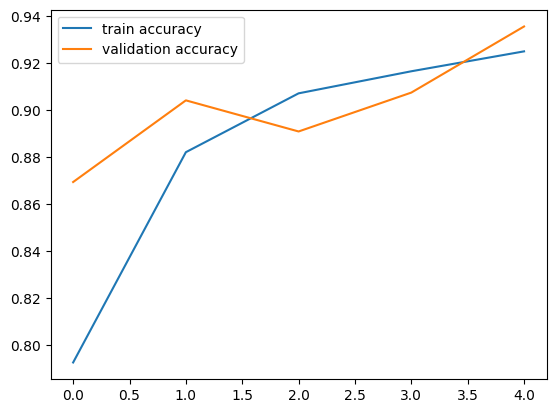

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive system

Path of the image to be predicted: /content/Mask.jpg


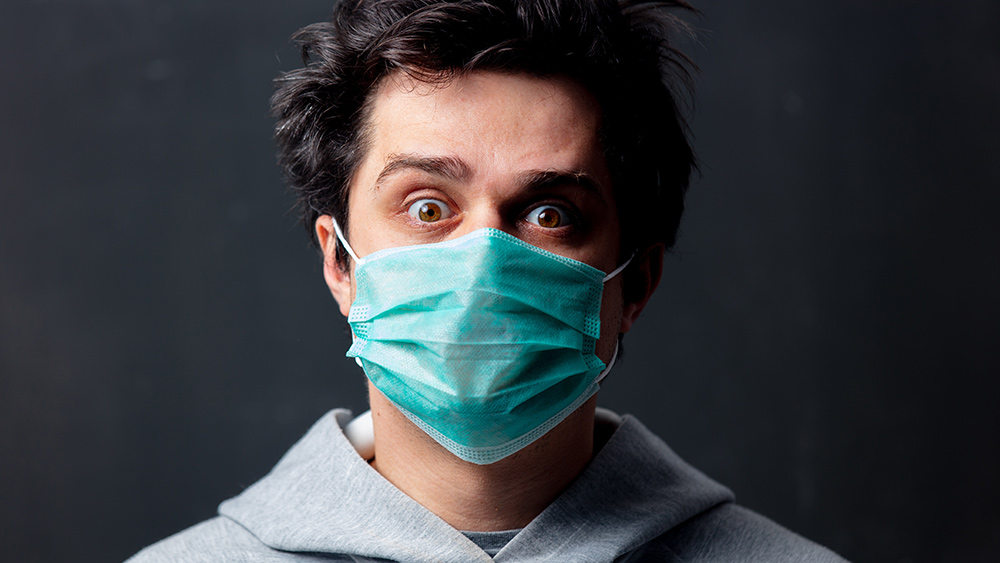

1/1 [==============================] - 0s 70ms/step
[[0.5498374  0.39722008]]
0
The person in the image is  wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is  wearing a mask')

Path of the image to be predicted: /content/nomask.jpeg


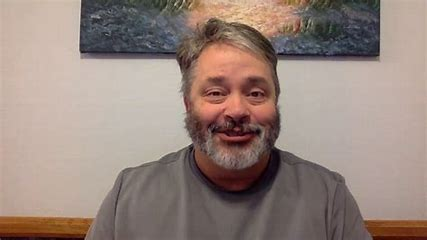

1/1 [==============================] - 0s 44ms/step
[[0.3960192 0.5215055]]
1
The person in the image is not wearing a mask


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is  wearing a mask')